In [2]:
import os
os.getcwd()

'C:\\Users\\Anudeep\\projects\\drafts\\Untitled Folder\\Hyprful'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sep = pd.read_csv('Orders-Tue Sep 01 2020-Wed Sep 30 2020.csv')
oct1 = pd.read_csv('Orders-Thu Oct 01 2020-Thu Oct 15 2020.csv')
oct2 = pd.read_csv('Orders-Fri Oct 16 2020-Sat Oct 31 2020.csv')
nov = pd.read_csv('Orders-Sun Nov 01 2020-Thu Nov 19 2020.csv')

C:\Users\Anudeep\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
oct1.tail(1)

,Order ID,Channel,Status,Brand,Pod,Edited,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Channel.1,Discount,Items,Options
20828,85873857069,SWIGGY,DISPATCHED,Istah,Koramangala,NaN,2020-10-16 03:21:31,2020-10-16 03:21:54,2020-10-16 03:36:35,2020-10-16 03:37:07,NaN,310.0,286.0,14.3,10,SWIGGY,0.0,Chicken Shawarma In Khubus,NaN


In [6]:
oct2.head(1)

,Order ID,Channel,Status,Brand,Pod,Edited,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Channel.1,Discount,Items,Options
0,1569646965,ZOMATO,DISPATCHED,Istah,Koramangala,NaN,2020-10-16 10:53:33,2020-10-16 10:53:58,2020-10-16 11:06:18,2020-10-16 11:07:15,NaN,125.61,163.0,6.52,5,ZOMATO,48.9,Chicken Sabbah (rumali Wrap),NaN


## Based on the data, I have found below pointers as useful insights which can be extracted.
1. Top Selling items
2. Top Performing areas (both based on sales and ROI for discounts promotions)
3. Discounts Analysis
4. Order value analysis
5. Hourly and Weekly orders analysis
6. Time taken to accept orders and time taken to mark food ready.
7. Cancelled orders analysis

In [7]:
print(oct1.shape, oct2.shape)

(20829, 19) (22261, 19)


In [8]:
oct = pd.concat([oct1, oct2])
print(oct.shape)

(43090, 19)


In [9]:
df = pd.concat([sep, oct, nov])
df.shape

(105591, 19)

In [10]:
df.head()

,Order ID,Channel,Status,Brand,Pod,Edited,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Channel.1,Discount,Items,Options
0,82013892929,SWIGGY,DISPATCHED,Istah,Barkatpura,NaN,2020-09-01 11:08:18,2020-09-01 11:08:49,2020-09-01 11:17:17,2020-09-01 11:18:52,NaN,166.00,153.0,7.65,5,SWIGGY,0.0,Istah's Chicken Shawarma (rumali),NaN
1,82013911064,SWIGGY,DISPATCHED,Istah,Koramangala,NaN,2020-09-01 11:08:58,2020-09-01 11:28:42,NaN,2020-09-01 11:48:23,NaN,331.00,306.0,15.30,10,SWIGGY,0.0,Istah's Chicken Shawarma (khubus),NaN
2,1051225769,ZOMATO,DISPATCHED,Istah,Kudlu Gate,NaN,2020-09-01 11:12:35,2020-09-01 11:13:50,2020-09-01 12:10:32,2020-09-01 12:11:13,NaN,197.32,223.0,8.92,10,ZOMATO,44.6,Chicken Biryani - Full,NaN
3,82014189948,SWIGGY,DISPATCHED,Istah,Nanakramguda,NaN,2020-09-01 11:13:53,2020-09-01 11:14:40,2020-09-01 11:30:16,2020-09-01 11:30:34,NaN,389.00,360.0,18.00,10,SWIGGY,0.0,"Chicken Shawarma In Khubus, Fruit Milk By Goli...",NaN
4,82014252406,SWIGGY,DISPATCHED,Istah,Balkampet,NaN,2020-09-01 11:14:47,2020-09-01 11:17:24,2020-09-01 11:36:55,2020-09-01 11:37:30,NaN,248.00,226.0,11.30,10,SWIGGY,0.0,Hummus With Toasted Pita Bread,NaN


In [10]:
df.isnull().sum()

Order ID              0
Channel               0
Status                0
Brand                 0
Pod                   0
Edited           105575
Created At            0
Accepted At        2566
M.F.R At           5628
Dispatched         4627
Cancelled        101246
Grand Total           0
Sub Total             0
Total Taxes           0
Total Charges         0
Channel.1             0
Discount              0
Items               178
Options          104249
dtype: int64

There are lots of missing values. For the purpose of analysis and visualisation, some features are selected irrespective of nulls.

In [239]:
df.loc[df['Cancelled'].notnull()].head()

,Order ID,Channel,Status,Brand,Pod,Edited,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Channel.1,Discount,Items,Options
7,82014844739,SWIGGY,CANCELLED,Istah,Kokapet,NaN,2020-09-01 11:24:34,2020-09-01 11:28:48,2020-09-01 11:36:23,NaN,2020-09-01 12:20:10,331.0,306.0,15.30,10,SWIGGY,0.0,Istah's Chicken Shawarma (rumali),NaN
64,82020411372,SWIGGY,CANCELLED,Istah,Kondapur (old),NaN,2020-09-01 12:56:58,2020-09-01 12:57:21,NaN,NaN,2020-09-01 12:57:47,245.0,223.0,11.15,10,SWIGGY,0.0,Chicken Biryani - Full,NaN
113,82023070217,SWIGGY,CANCELLED,Istah,Kukatpally,NaN,2020-09-01 13:41:16,2020-09-01 13:41:35,NaN,NaN,2020-09-01 13:41:39,155.4,173.0,6.92,10,SWIGGY,34.6,Chicken Biryani - Single,NaN
143,82025182665,SWIGGY,CANCELLED,Istah,Nallagandla,NaN,2020-09-01 14:16:29,2020-09-01 14:16:54,NaN,NaN,2020-09-01 14:17:41,192.0,173.0,8.65,10,SWIGGY,0.0,Chicken Biryani - Single,NaN
158,82026006475,SWIGGY,CANCELLED,Istah,Neredmet,NaN,2020-09-01 14:30:12,2020-09-01 14:30:46,2020-09-01 14:38:14,2020-09-01 14:50:02,2020-09-01 15:40:56,331.0,306.0,15.30,10,SWIGGY,0.0,Istah's Chicken Shawarma (rumali),NaN


In [241]:
df.loc[df['Cancelled'].notnull()].shape

(4345, 19)

In [240]:
df['Status'].value_counts()

DISPATCHED      98908
CANCELLED        4364
NOT_ACCEPTED     2154
ACCEPTED           84
FOOD_READY         81
Name: Status, dtype: int64

Assuming the nulls in 'Cancelled' as non-cancelled orders, as the number of cancelled orders in both Status and Cancelled are almost same.

In [20]:
df['Channel'].value_counts()

SWIGGY      71412
ZOMATO      31893
HYPRFUL      2283
UNMAPPED        2
DUNZO           1
Name: Channel, dtype: int64

In [21]:
df['Channel.1'].value_counts()

SWIGGY      71412
ZOMATO      31893
HYPRFUL      2283
UNMAPPED        2
DUNZO           1
Name: Channel.1, dtype: int64

In [11]:
vis_df = df.drop(['Order ID', 'Channel.1', 'Brand', 'Edited', 'Options'], axis=1)
vis_df.columns

Index(['Channel', 'Status', 'Pod', 'Created At', 'Accepted At', 'M.F.R At',
       'Dispatched', 'Cancelled', 'Grand Total', 'Sub Total', 'Total Taxes',
       'Total Charges', 'Discount', 'Items'],
      dtype='object')

In [12]:
time_cols = ['Created At', 'Accepted At', 'M.F.R At', 'Dispatched', 'Cancelled']
for col in time_cols:
    vis_df[col] = pd.to_datetime(vis_df[col], format='%Y%m%d %H:%M:%S')

In [13]:
vis_df.dtypes

Channel                  object
Status                   object
Pod                      object
Created At       datetime64[ns]
Accepted At      datetime64[ns]
M.F.R At         datetime64[ns]
Dispatched       datetime64[ns]
Cancelled        datetime64[ns]
Grand Total             float64
Sub Total               float64
Total Taxes             float64
Total Charges             int64
Discount                float64
Items                    object
dtype: object

In [14]:
vis_df.describe()

,Grand Total,Sub Total,Total Taxes,Total Charges,Discount
count,105591.000000,105591.000000,105591.000000,105591.000000,105591.000000
mean,260.269006,270.545328,12.313530,9.078851,31.559018
std,163.871399,159.824051,7.663108,6.049038,33.897111
min,3.000000,20.000000,0.000000,0.000000,0.000000
25%,155.000000,153.000000,7.160000,5.000000,0.000000
50%,203.800000,223.000000,9.640000,10.000000,30.600000
75%,311.600000,306.000000,14.800000,10.000000,50.000000
max,4891.000000,4498.000000,232.900000,260.000000,714.000000


# 1. Top Selling Items

In [100]:
vis_df['Items'].value_counts()

Istah's Chicken Shawarma (rumali)                                                                                                             23398
Istah's Chicken Shawarma (khubus)                                                                                                             11855
Chicken Shawarma In Rumali                                                                                                                     7199
Chicken Sabbah (rumali Wrap)                                                                                                                   7076
Chicken Biryani - Single                                                                                                                       3985
                                                                                                                                              ...  
Kwality Walls Unicornetto, Paneer Shawarma, Istah's Chicken Shawarma (rumali), Chicken Sahaan (meat Bowl) + Humm

In [238]:
len(vis_df['Items'].unique())

5802

In [14]:
items = vis_df.groupby(['Items']).count().sort_values(by=['Channel'], ascending=False)[:10]
items.head()

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount
Items,,,,,,,,,,,,,
Istah's Chicken Shawarma (rumali),23398,23398,23398,23398,23057,22385,22596,988,23398,23398,23398,23398,23398
Istah's Chicken Shawarma (khubus),11855,11855,11855,11855,11754,11369,11515,535,11855,11855,11855,11855,11855
Chicken Shawarma In Rumali,7199,7199,7199,7199,7113,6859,6926,398,7199,7199,7199,7199,7199
Chicken Sabbah (rumali Wrap),7076,7076,7076,7076,7016,6812,6916,222,7076,7076,7076,7076,7076
Chicken Biryani - Single,3985,3985,3985,3985,3854,3701,3730,217,3985,3985,3985,3985,3985


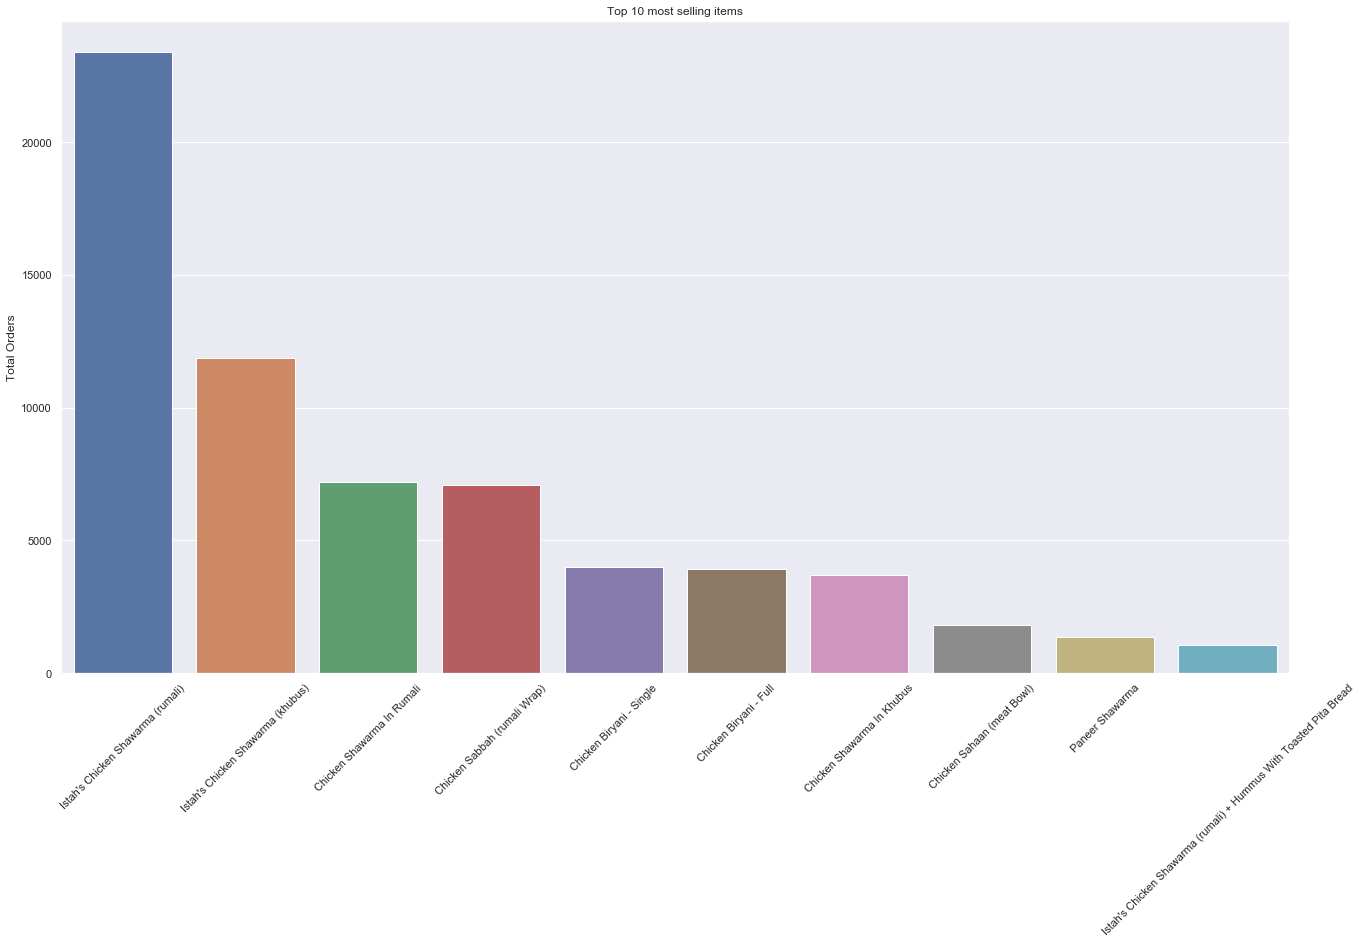

In [462]:
sns.set()
plt.figure(figsize=(22, 12))
sns.barplot(x=items.index, y=items['Channel'], ci=None)
plt.title('Top 10 most selling items')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Total Orders')
plt.show()

# 2. Top Performing Areas

In [15]:
vis_df.Pod.value_counts()

Kukatpally        12100
Madhapur          10088
Balkampet          9481
Barkatpura         8185
Kothapet           8165
Nallagandla        7639
Kokapet            7253
Neredmet           6619
Nanakramguda       6547
Koramangala        6277
Masab Tank         5854
Shaikpet           5584
Kondapur           5197
Kondapur (old)     3403
Kudlu Gate         3199
Name: Pod, dtype: int64

In [15]:
loc_wise = vis_df.groupby('Pod')[['Sub Total', 'Discount']].sum().sort_values(by=['Sub Total'], ascending=False)

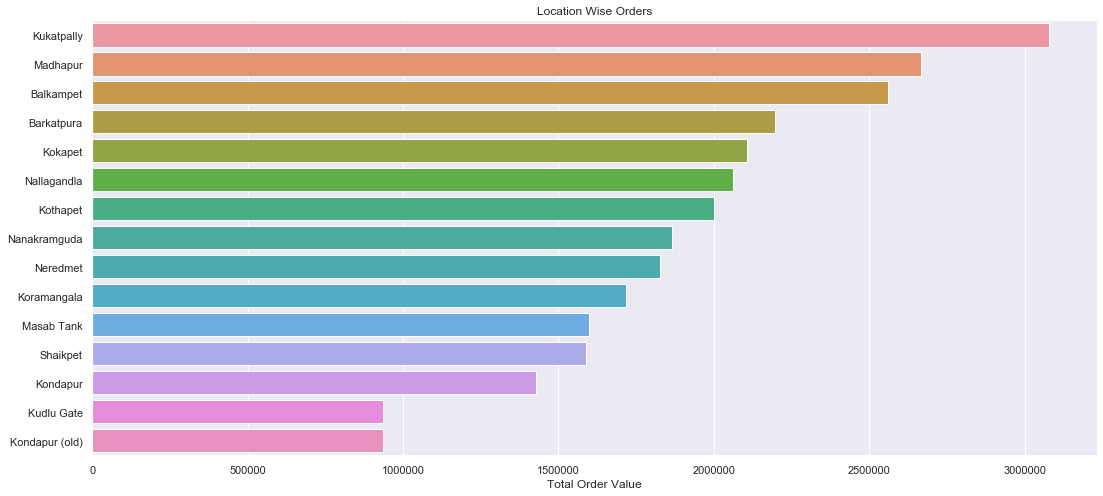

In [385]:
sns.set()
plt.figure(figsize=(18, 8))
sns.barplot(y=loc_wise.index, x=loc_wise['Sub Total'], ci=None)
plt.title('Location Wise Orders')
plt.xlabel('Total Order Value')
plt.ylabel(None)
plt.show()

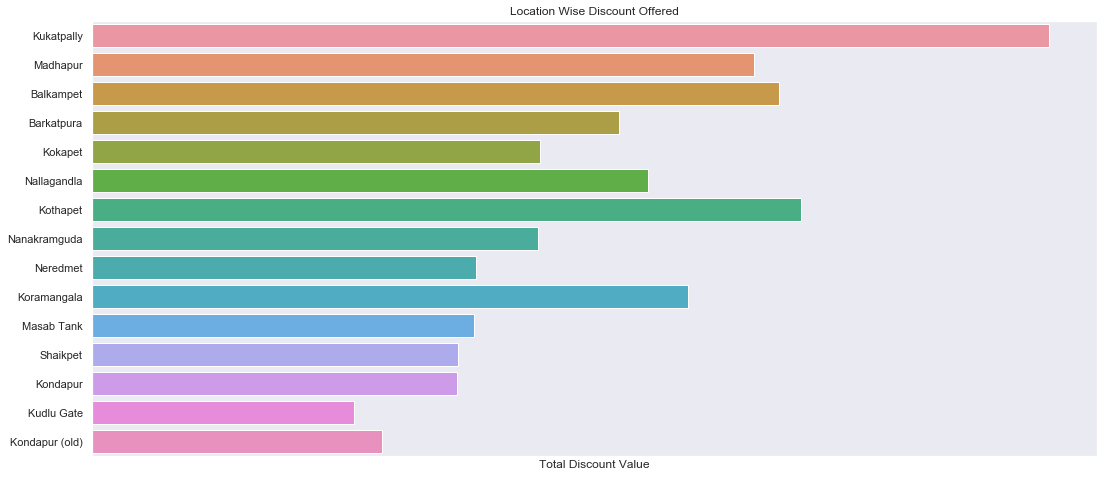

In [116]:
sns.set()
plt.figure(figsize=(18, 8))
sns.barplot(y=loc_wise.index, x=loc_wise['Discount'], ci=None)
plt.title('Location Wise Discount Offered')
plt.xticks([])
plt.xlabel('Total Discount Value')
plt.ylabel(None)
plt.show()

In [16]:
loc_wise['ratio'] = round(loc_wise['Sub Total']/loc_wise['Discount'], 2)
loc_wise.sort_values(by=['ratio'], ascending=False)

,Sub Total,Discount,ratio
Pod,,,
Neredmet,1827511.00,167522.15,10.91
Kokapet,2106777.00,195486.78,10.78
Shaikpet,1589044.14,159699.65,9.95
Nanakramguda,1864339.00,194483.61,9.59
Masab Tank,1599267.00,166685.22,9.59
Barkatpura,2197793.61,230150.21,9.55
Madhapur,2666032.00,288992.29,9.23
Kondapur,1426399.00,159057.37,8.97
Balkampet,2559285.00,299787.52,8.54


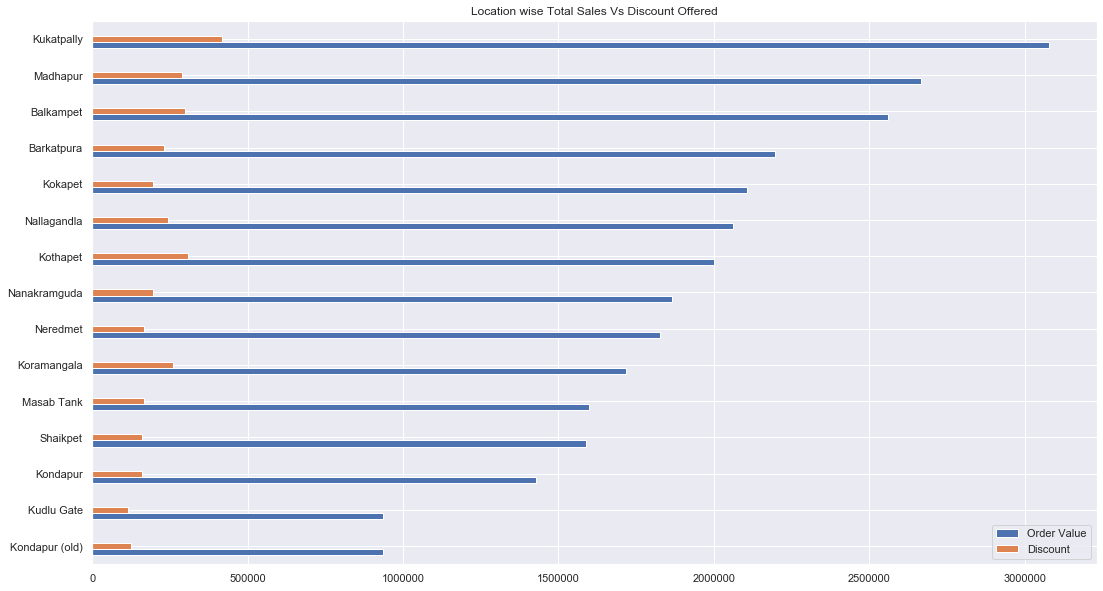

In [396]:
loc_wise.sort_values(by=['Sub Total']).plot.barh(figsize=(18, 10))
plt.ylabel(None)
plt.legend(['Order Value', 'Discount'])
plt.title('Location wise Total Sales Vs Discount Offered')
plt.show()

### Based on the sales to discount offered ratio, areas like Kothapet and Koramangala are the least performing in terms of Sales. Neredmet and Kokapet add highest ROI wrt discounts.

# 3. Discounts Analysis

In [17]:
disc = vis_df[vis_df['Discount']!=0]
disc.describe()

,Grand Total,Sub Total,Total Taxes,Total Charges,Discount
count,65028.000000,65028.000000,65028.000000,65028.000000,65028.000000
mean,249.997698,280.036553,11.920354,9.439011,51.244822
std,156.692406,158.747181,7.311557,6.129212,29.273594
min,3.000000,60.000000,0.000000,0.000000,11.300000
25%,133.520000,159.000000,6.500000,5.000000,30.600000
50%,207.800000,248.000000,10.340000,10.000000,49.980000
75%,281.900000,316.000000,13.300500,10.000000,50.000000
max,4891.000000,4498.000000,232.900000,260.000000,714.000000


In [18]:
disc['Created_date'] = pd.to_datetime(disc['Created At'].dt.date)
disc.dtypes

C:\Users\Anudeep\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Channel                  object
Status                   object
Pod                      object
Created At       datetime64[ns]
Accepted At      datetime64[ns]
M.F.R At         datetime64[ns]
Dispatched       datetime64[ns]
Cancelled        datetime64[ns]
Grand Total             float64
Sub Total               float64
Total Taxes             float64
Total Charges             int64
Discount                float64
Items                    object
Created_date     datetime64[ns]
dtype: object

In [19]:
disc_agg = disc.groupby(['Channel', 'Created_date'])[['Discount', 'Sub Total']].sum()
disc_agg

Discount  Sub Total
Channel Created_date                     
SWIGGY  2020-09-01    25256.35   158643.0
        2020-09-02    29275.69   178604.0
        2020-09-03    25935.98   158882.0
        2020-09-04    26263.87   162157.0
        2020-09-05    28944.00   174692.0
...                        ...        ...
ZOMATO  2020-11-15    24111.00    99979.0
        2020-11-16    17091.19    70956.0
        2020-11-17    20156.40    88312.0
        2020-11-18    22104.80    81934.0
        2020-11-19    20774.37    89834.0

[160 rows x 2 columns]

In [20]:
disc_agg.reset_index(inplace=True)
disc_agg

,Channel,Created_date,Discount,Sub Total
0,SWIGGY,2020-09-01,25256.35,158643.0
1,SWIGGY,2020-09-02,29275.69,178604.0
2,SWIGGY,2020-09-03,25935.98,158882.0
3,SWIGGY,2020-09-04,26263.87,162157.0
4,SWIGGY,2020-09-05,28944.00,174692.0
...,...,...,...,...
155,ZOMATO,2020-11-15,24111.00,99979.0
156,ZOMATO,2020-11-16,17091.19,70956.0
157,ZOMATO,2020-11-17,20156.40,88312.0
158,ZOMATO,2020-11-18,22104.80,81934.0


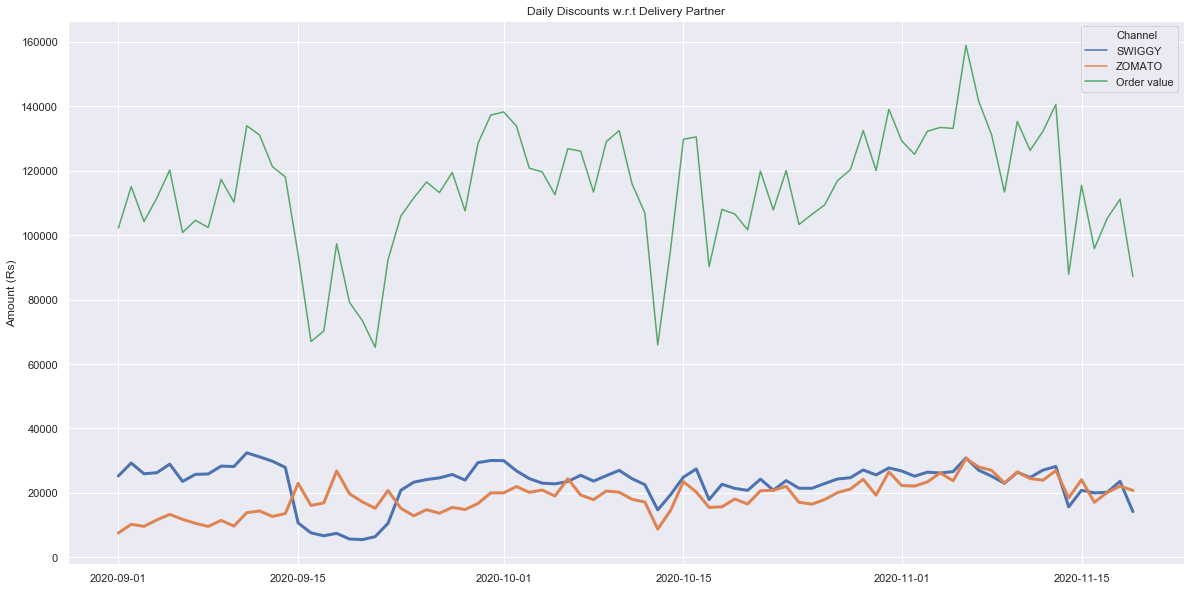

In [460]:
plt.figure(figsize=(20, 10))
sns.lineplot(disc_agg['Created_date'].dt.date, disc_agg['Discount'], ci=None, hue=disc_agg['Channel'], linewidth=3)
sns.lineplot(disc_agg['Created_date'].dt.date, disc_agg['Sub Total'], ci=None, color='g', label='Order value')
plt.title('Daily Discounts w.r.t Delivery Partner')
plt.xlabel('')
plt.ylabel('Amount (Rs)')
plt.show()

### The plot clearly shows that discounts and order value are highly positively correlated. Drop in the discounts is clearly affecting the sales in the same pattern. Also a critical point to observe is that, consistent amount of discount is causing order values to increase linearly and in some cases exponentially like 2020-09-22 to 2020-09-28, 2020-10-22 to 2020-10-28. This shows that a fixed discount offer for longer time can boost the orders with a linear growth or exponential growth. 

# 4. Order Value Analysis

In [227]:
vis_df[vis_df['Grand Total']<=10]

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items
20266,ZOMATO,DISPATCHED,Nanakramguda,2020-09-18 22:15:11,2020-09-18 22:15:33,2020-09-18 22:26:16,2020-09-18 22:28:19,NaT,3.00,60.0,3.00,0,60.0,Rumali Roti
19159,ZOMATO,CANCELLED,Kukatpally,2020-10-14 23:25:17,2020-10-14 23:25:44,2020-10-14 23:32:10,NaT,2020-10-14 23:47:56,9.15,183.0,9.16,0,183.0,"Istah's Chicken Shawarma (rumali), Sizzling Sp..."
19478,ZOMATO,DISPATCHED,Kokapet,2020-10-15 14:23:57,2020-10-15 14:24:31,2020-10-15 14:34:29,2020-10-15 14:36:30,NaT,7.65,153.0,7.66,0,153.0,Istah's Chicken Shawarma (rumali)
6940,ZOMATO,DISPATCHED,Nanakramguda,2020-10-21 20:17:29,2020-10-21 20:17:55,2020-10-21 20:22:15,2020-10-21 20:28:00,NaT,8.45,139.0,6.96,0,137.5,Chicken Shawarma In Khubus
18153,ZOMATO,DISPATCHED,Madhapur,2020-10-29 19:59:53,2020-10-29 20:00:28,2020-10-29 20:10:33,2020-10-29 20:11:26,NaT,8.75,159.0,7.96,0,158.2,Chicken Sabbah (rumali Wrap)
10021,ZOMATO,DISPATCHED,Masab Tank,2020-11-07 11:51:01,2020-11-07 11:51:40,2020-11-07 12:03:40,2020-11-07 12:06:52,NaT,7.95,159.0,7.94,0,159.0,Chicken Sabbah (rumali Wrap)
10421,ZOMATO,DISPATCHED,Neredmet,2020-11-07 17:07:00,2020-11-07 17:07:22,2020-11-07 17:13:44,2020-11-07 17:14:45,NaT,7.95,159.0,7.96,0,159.0,Chicken Sabbah (rumali Wrap)
14673,ZOMATO,DISPATCHED,Kukatpally,2020-11-10 01:02:00,2020-11-10 01:02:25,2020-11-10 01:09:39,2020-11-10 01:17:04,NaT,7.95,159.0,7.96,0,159.0,Chicken Sabbah (rumali Wrap)
19780,ZOMATO,DISPATCHED,Nallagandla,2020-11-13 12:40:08,2020-11-13 12:40:31,2020-11-13 12:53:53,2020-11-13 12:54:05,NaT,6.95,139.0,6.94,0,139.0,Chicken Shawarma In Khubus


In [61]:
vis_df.sort_values(by=['Discount'], ascending=False)[:30]

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items
19991,ZOMATO,DISPATCHED,Masab Tank,2020-10-15 19:38:03,2020-10-15 19:38:23,2020-10-15 20:07:07,2020-10-15 20:08:07,NaN,837.50,1430.0,71.52,50,714.00,"Chicken Shawarma In Khubus, Chicken Shawarma I..."
21459,ZOMATO,DISPATCHED,Koramangala,2020-11-14 13:34:15,2020-11-14 13:34:37,2020-11-14 13:51:55,2020-11-14 13:55:09,NaN,54.60,692.0,34.60,20,692.00,"Chicken Shawarma In Rumali, Garlic Mayonnaise"
3064,ZOMATO,DISPATCHED,Masab Tank,2020-10-18 19:08:15,2020-10-18 19:08:38,2020-10-18 19:30:50,2020-10-18 19:37:11,NaN,322.90,918.0,45.90,30,671.00,"Istah's Chicken Shawarma (rumali), Paneer Shaw..."
13651,ZOMATO,DISPATCHED,Masab Tank,2020-11-09 16:49:37,2020-11-09 16:50:01,2020-11-09 17:00:53,2020-11-09 17:15:55,NaN,186.25,765.0,38.26,25,642.00,Istah's Chicken Shawarma (rumali)
18169,ZOMATO,DISPATCHED,Nallagandla,2020-10-14 13:00:11,2020-10-14 13:00:58,2020-10-14 14:04:06,2020-10-14 14:04:51,NaN,31.80,636.0,31.80,0,636.00,Chicken Sabbah (rumali Wrap)
30964,ZOMATO,DISPATCHED,Shaikpet,2020-09-29 14:42:04,2020-09-29 14:42:48,2020-09-29 14:54:59,2020-09-29 14:56:40,NaN,115.60,612.0,30.62,25,552.00,"Chicken Biryani - Single, Istah's Chicken Shaw..."
21127,ZOMATO,DISPATCHED,Kondapur,2020-10-31 18:32:23,2020-10-31 18:32:42,2020-10-31 18:48:23,2020-10-31 18:50:15,NaN,47.60,552.0,27.62,20,552.00,"Istah's Chicken Shawarma (rumali), Coconut Wat..."
18338,ZOMATO,DISPATCHED,Kukatpally,2020-10-14 15:09:03,2020-10-14 15:09:25,2020-10-14 15:30:19,2020-10-14 15:30:51,NaN,78.89,592.0,29.62,0,542.71,"Ipl Kkr Combo, Chicken Shawarma In Rumali"
1969,ZOMATO,DISPATCHED,Nallagandla,2020-10-17 17:51:35,2020-10-17 17:51:59,2020-10-17 18:20:59,2020-10-17 18:23:30,NaN,275.75,745.0,35.78,25,530.00,"Chicken Shawarma In Rumali, Istah's Chicken Sh..."
16708,ZOMATO,DISPATCHED,Shaikpet,2020-10-12 19:24:02,2020-10-12 19:24:24,2020-10-12 19:39:28,2020-10-12 20:13:42,NaN,557.45,989.0,49.46,25,506.00,"Chicken Sabbah (rumali Wrap), Hummus With Toas..."


Some orders show Grand Total of less than 5 rs. This is because the discounts are already included. So created a new column called order_value, that is the sum of cart value + 5%GST + delivery partner charge.

In [21]:
vis_df['order_value'] = vis_df['Sub Total'] + vis_df['Total Taxes'] + vis_df['Total Charges']
vis_df.sort_values(by=['order_value'])[:30]

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items,order_value
10653,SWIGGY,DISPATCHED,Kothapet,2020-09-09 23:20:54,2020-09-09 23:21:21,2020-09-09 23:29:18,2020-09-09 23:29:49,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
10674,SWIGGY,DISPATCHED,Kothapet,2020-09-09 23:29:13,2020-09-09 23:29:35,2020-09-09 23:38:31,2020-09-09 23:38:51,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
207,SWIGGY,DISPATCHED,Kukatpally,2020-09-01 15:17:03,2020-09-01 15:17:25,2020-09-01 15:24:18,2020-09-01 15:24:31,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
10658,SWIGGY,DISPATCHED,Kothapet,2020-09-09 23:24:18,2020-09-09 23:24:44,2020-09-09 23:25:11,2020-09-09 23:28:25,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
7053,SWIGGY,DISPATCHED,Kothapet,2020-09-06 23:26:46,2020-09-06 23:27:15,2020-09-06 23:31:57,2020-09-06 23:32:53,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
7046,SWIGGY,DISPATCHED,Kothapet,2020-09-06 23:23:50,2020-09-06 23:24:20,2020-09-06 23:31:32,2020-09-06 23:32:50,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
3436,SWIGGY,DISPATCHED,Kothapet,2020-09-03 23:49:34,2020-09-03 23:50:25,2020-09-04 00:00:27,2020-09-04 00:01:01,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
19892,SWIGGY,DISPATCHED,Kothapet,2020-09-18 18:04:52,2020-09-18 18:05:23,2020-09-18 18:09:04,2020-09-18 18:09:46,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
18686,SWIGGY,DISPATCHED,Kothapet,2020-09-16 23:24:20,2020-09-16 23:24:42,2020-09-16 23:25:30,2020-09-16 23:33:47,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0
24690,HYPRFUL,DISPATCHED,Kondapur,2020-11-16 23:32:33,2020-11-16 23:32:41,2020-11-16 23:34:42,2020-11-16 23:34:49,NaT,21.0,20.0,1.0,0,0.0,Rumali Roti,21.0


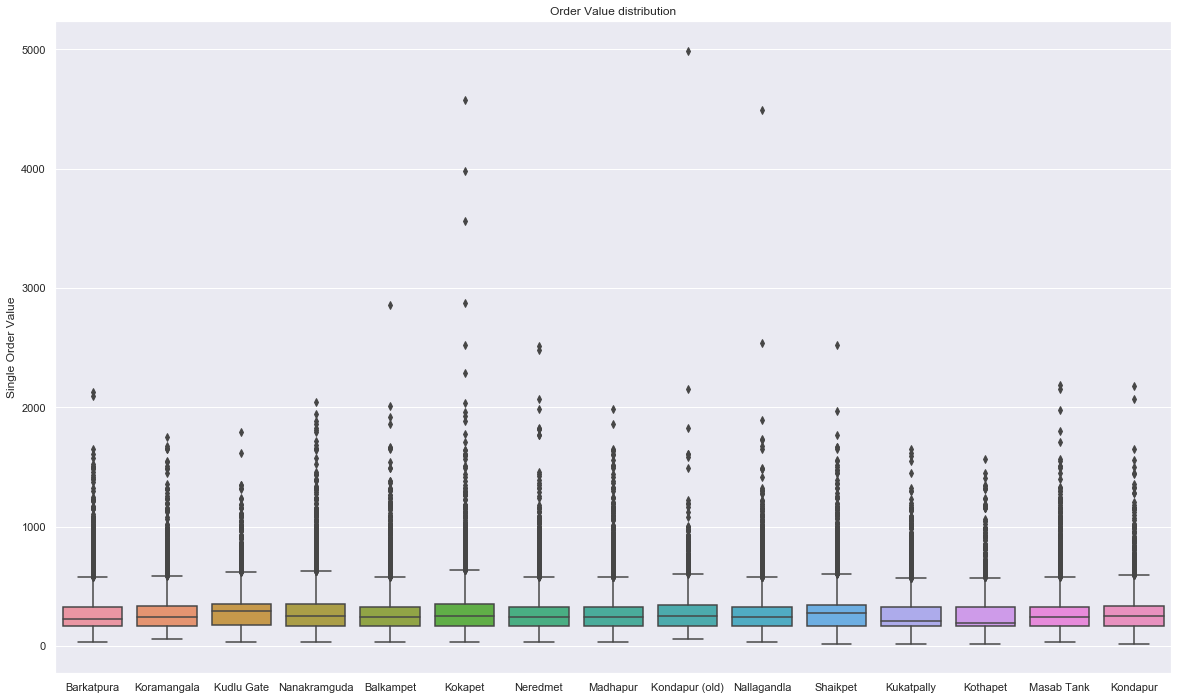

In [234]:
sns.set()
plt.figure(figsize=(20, 12))
sns.boxplot(x='Pod', y='order_value', data=vis_df) 
plt.title('Order Value distribution')
plt.xlabel('')
plt.ylabel('Single Order Value')
plt.show()

#### Although order_value and Grand Total look very similar in distribution, the actual minimum order value is 21Rs for rumali roti. The distribution for all the areas is similar as well with most of the orders lying under 500Rs and the maximum just above around 700Rs. But there are many outliers with some reaching order value of 5000Rs. Kokapet has the most number of bigger(bulk) orders, while Kudlu Gate has the least. 

# 4. Hourly and Weekly Orders Analysis

In [22]:
hour_df = vis_df.resample('H', on='Created At').count()

In [371]:
hour_df.head()

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items,order_value
Created At,,,,,,,,,,,,,,,
2020-09-01 11:00:00,27,27,27,27,27,26,26,1,27,27,27,27,27,27,27
2020-09-01 12:00:00,42,42,42,42,42,39,41,1,42,42,42,42,42,42,42
2020-09-01 13:00:00,62,62,62,62,62,60,61,1,62,62,62,62,62,62,62
2020-09-01 14:00:00,60,60,60,60,60,57,58,3,60,60,60,60,60,60,60
2020-09-01 15:00:00,59,59,59,59,59,57,57,3,59,59,59,59,59,59,59


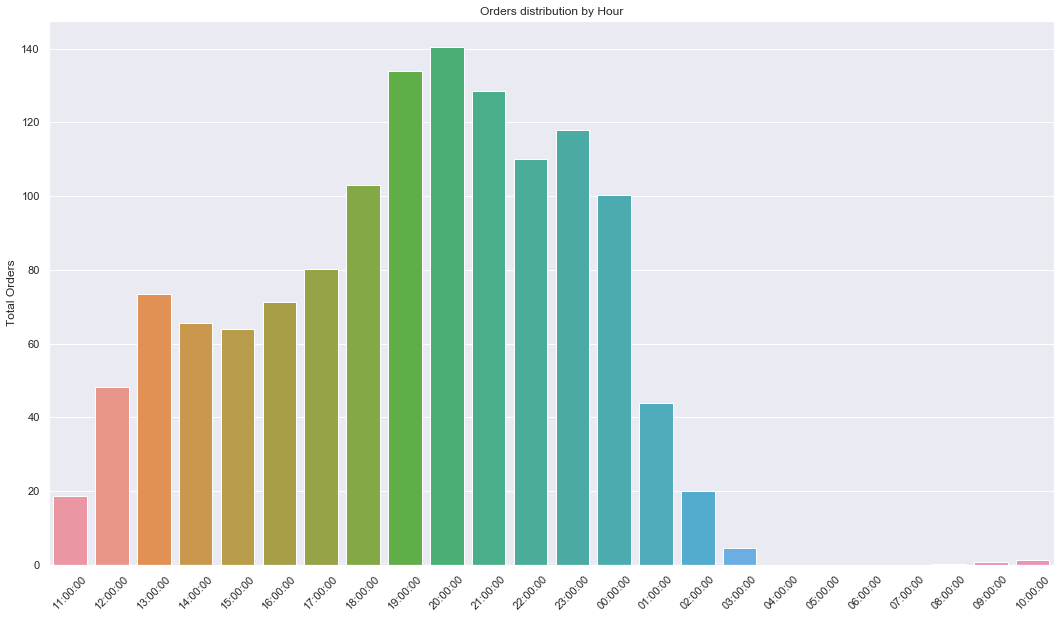

In [369]:
sns.set()
plt.figure(figsize=(18, 10))
sns.barplot(x=hour_df.index.time, y=hour_df['Channel'], ci=None)
plt.title('Orders distribution by Hour')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Total Orders')
plt.show()

#### Hourly orders show normal trend as expected. Orders from 5PM show a dramatic increase, reaching peak by 8-9 PM with almost twice as orders as Lunch time's. This shows users likley prefer to order it as snack or as a light meal in the nights. 

In [23]:
hrlyOrd_by_chanl = vis_df.groupby(['Channel'])[['Status', 'Created At']].resample('H', on='Created At').count()
hrlyOrd_by_chanl.drop('Created At', axis=1, inplace=True)

In [26]:
hrlyOrd_by_chanl.reset_index(inplace=True)
x = hrlyOrd_by_chanl.sort_values(by=['Created At'])

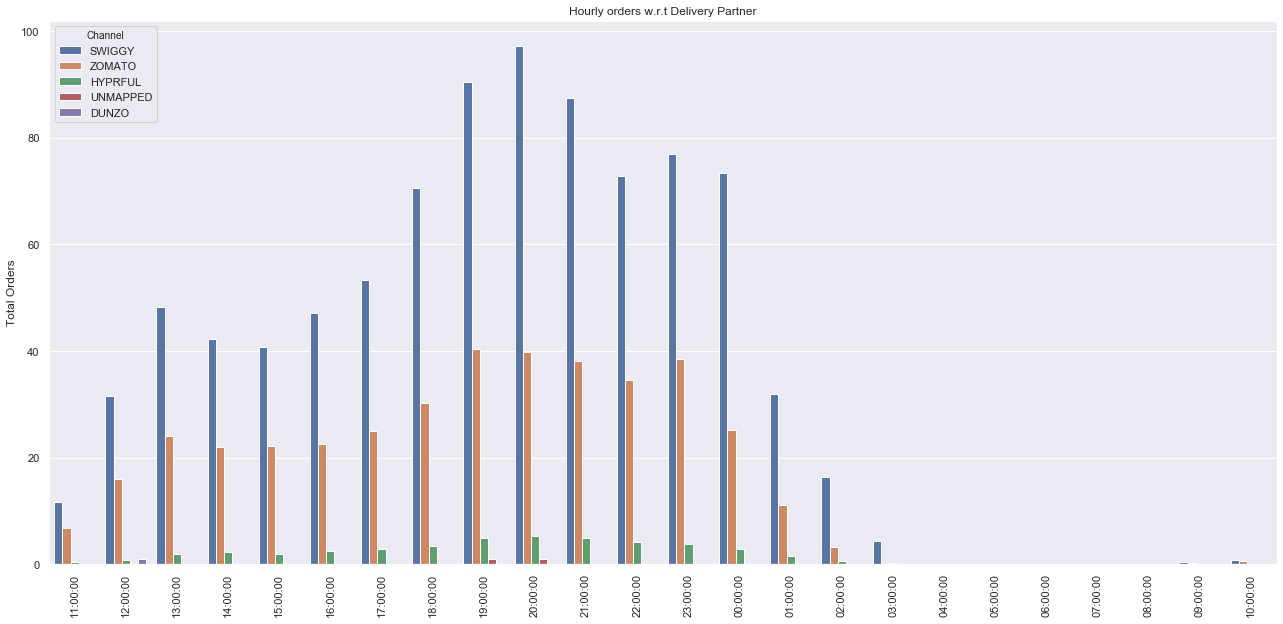

In [384]:
plt.figure(figsize=(22, 10))
sns.barplot(x['Created At'].dt.time, x['Status'], ci=None, hue=x['Channel'])
plt.title('Hourly orders w.r.t Delivery Partner')
plt.xlabel('')
plt.ylabel('Total Orders')
plt.xticks(rotation=90)
plt.show()

#### Orders from Swiggy are more in any time of the day. Zomato orders in a day are usually approx half of total(Swiggy) orders. Orders from Hyprful and Dunzo are least and ignored.

In [27]:
sep_df = vis_df[(vis_df['Created At']>'2020-09') & (vis_df['Created At']<'2020-10')]
week_df_sep = sep_df.groupby(sep_df['Created At'].dt.weekday_name).count()
week_df_sep

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items,order_value
Created At,,,,,,,,,,,,,,,
Friday,4764,4764,4764,4764,4746,4587,4617,254,4764,4764,4764,4764,4764,4586,4764
Monday,4262,4262,4262,4262,4244,4118,4136,221,4262,4262,4262,4262,4262,4262,4262
Saturday,4593,4593,4593,4593,4575,4400,4439,248,4593,4593,4593,4593,4593,4593,4593
Sunday,4156,4156,4156,4156,4119,3875,4012,211,4156,4156,4156,4156,4156,4156,4156
Thursday,4259,4259,4259,4259,4249,4120,4127,234,4259,4259,4259,4259,4259,4259,4259
Tuesday,5597,5597,5597,5597,5553,5347,5388,344,5597,5597,5597,5597,5597,5597,5597
Wednesday,5798,5798,5798,5798,5731,5531,5586,304,5798,5798,5798,5798,5798,5798,5798


In [28]:
nov_df = vis_df[vis_df['Created At']>'2020-11']
week_df_nov =nov_df.groupby(nov_df['Created At'].dt.weekday_name).count()
week_df_nov

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items,order_value
Created At,,,,,,,,,,,,,,,
Friday,3559,3559,3559,3559,3455,3375,3418,87,3559,3559,3559,3559,3559,3559,3559
Monday,4193,4193,4193,4193,4089,3982,4040,108,4193,4193,4193,4193,4193,4193,4193
Saturday,2805,2805,2805,2805,2710,2664,2680,83,2805,2805,2805,2805,2805,2805,2805
Sunday,4496,4496,4496,4496,4359,4260,4311,125,4496,4496,4496,4496,4496,4496,4496
Thursday,4422,4422,4422,4422,4296,4134,4187,129,4422,4422,4422,4422,4422,4422,4422
Tuesday,4508,4508,4508,4508,4383,4267,4333,123,4508,4508,4508,4508,4508,4508,4508
Wednesday,5169,5169,5169,5169,5045,4894,4996,152,5169,5169,5169,5169,5169,5169,5169


In [29]:
oct_df = vis_df[(vis_df['Created At']>'2020-10') & (vis_df['Created At']<'2020-11')]
week_df_oct = oct_df.groupby(oct_df['Created At'].dt.weekday_name).count()
week_df_oct

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items,order_value
Created At,,,,,,,,,,,,,,,
Friday,7577,7577,7577,7577,7264,7080,7141,302,7577,7577,7577,7577,7577,7577,7577
Monday,5347,5347,5347,5347,5162,5025,5073,201,5347,5347,5347,5347,5347,5347,5347
Saturday,7129,7129,7129,7129,6843,6661,6696,252,7129,7129,7129,7129,7129,7129,7129
Sunday,5230,5230,5230,5230,5019,4892,4925,185,5230,5230,5230,5230,5230,5230,5230
Thursday,7319,7319,7319,7319,7063,6891,6943,268,7319,7319,7319,7319,7319,7319,7319
Tuesday,4894,4894,4894,4894,4731,4571,4616,232,4894,4894,4894,4894,4894,4894,4894
Wednesday,5514,5514,5514,5514,5307,5159,5193,282,5514,5514,5514,5514,5514,5514,5514


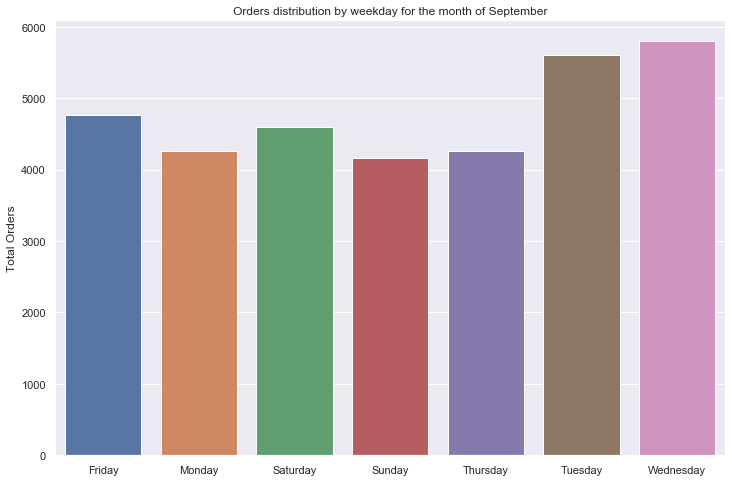

In [80]:
sns.set()
plt.figure(figsize=(12, 8))
sns.barplot(x=week_df_sep.index, y=week_df_sep['Channel'], ci=None)
plt.title('Orders distribution by weekday for the month of September')
plt.xlabel('')
plt.ylabel('Total Orders')
plt.show()

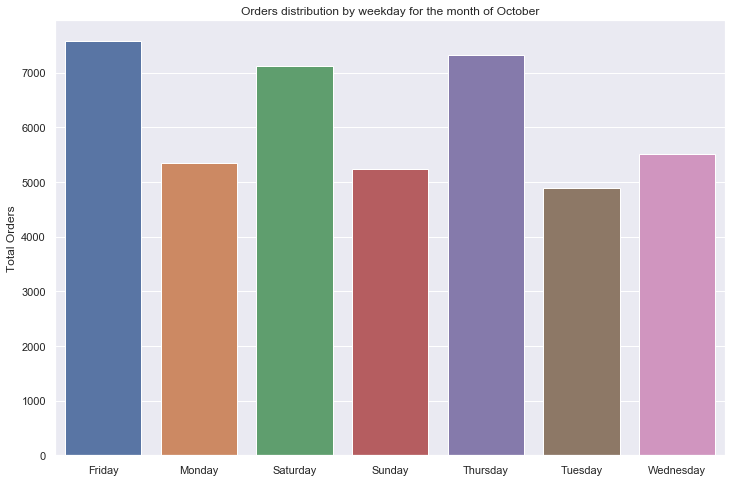

In [83]:
sns.set()
plt.figure(figsize=(12, 8))
sns.barplot(x=week_df_oct.index, y=week_df_oct['Channel'], ci=None)
plt.title('Orders distribution by weekday for the month of October')
plt.xlabel('')
plt.ylabel('Total Orders')
plt.show()

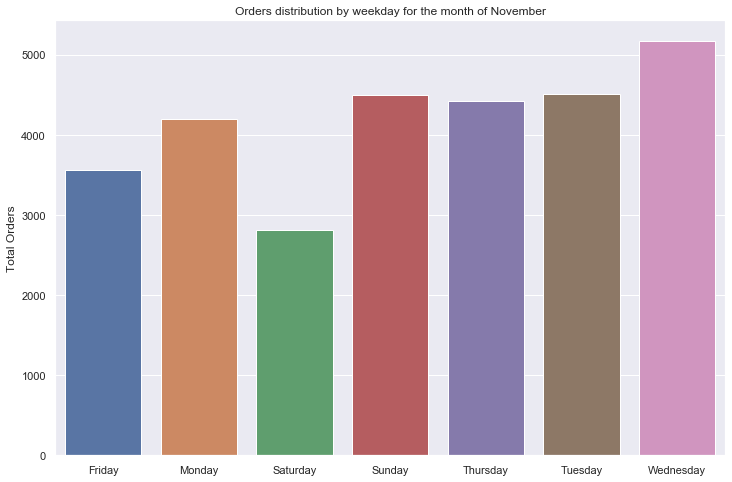

In [84]:
sns.set()
plt.figure(figsize=(12, 8))
sns.barplot(x=week_df_nov.index, y=week_df_nov['Channel'], ci=None)
plt.title('Orders distribution by weekday for the month of November')
plt.xlabel('')
plt.ylabel('Total Orders')
plt.show()

From the Discounts analysis, it is found that October and November have more discount offers compared to September. So October and November plots show weekday trends when offers are more, whereas September plot shows natural trends when there are less or no offers. More data is required to get an overall picture of weekday sales.

# 6. Cancelled Orders Analysis

In [29]:
vis_df['Channel'].value_counts()

SWIGGY      71412
ZOMATO      31893
HYPRFUL      2283
UNMAPPED        2
DUNZO           1
Name: Channel, dtype: int64

In [39]:
vis_df.Status.value_counts()

DISPATCHED      98908
CANCELLED        4364
NOT_ACCEPTED     2154
ACCEPTED           84
FOOD_READY         81
Name: Status, dtype: int64

In [30]:
canceld = vis_df.loc[vis_df['Cancelled'].notnull()]

In [31]:
canceld['Created At'].dt.hour

7        11
64       12
113      13
143      14
158      14
         ..
28507    17
28693    19
28785    19
28804    19
28844    20
Name: Created At, Length: 4345, dtype: int64

In [32]:
hourly_canceld = canceld.resample('H', on='Created At').count()
hourly_canceld = hourly_canceld[hourly_canceld['Cancelled']!=0]
hourly_canceld

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items,order_value
Created At,,,,,,,,,,,,,,,
2020-09-01 11:00:00,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
2020-09-01 12:00:00,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
2020-09-01 13:00:00,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
2020-09-01 14:00:00,3,3,3,3,3,2,1,3,3,3,3,3,3,3,3
2020-09-01 15:00:00,3,3,3,3,3,1,1,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19 14:00:00,2,2,2,2,1,0,0,2,2,2,2,2,2,2,2
2020-11-19 16:00:00,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1
2020-11-19 17:00:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


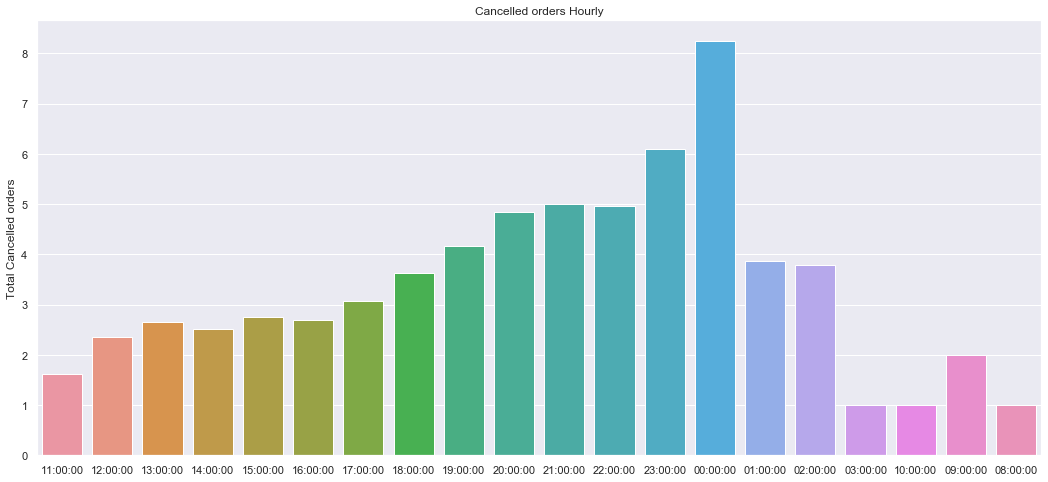

In [257]:
sns.set()
plt.figure(figsize=(18, 8))
sns.barplot(hourly_canceld.index.time, hourly_canceld['Cancelled'], ci=None)
plt.title('Cancelled orders Hourly')
plt.xlabel('')
plt.ylabel('Total Cancelled orders')
plt.show()

In [33]:
cancld_by_chanl = canceld.groupby(['Channel'])[['Cancelled', 'Created At']].resample('H', on='Created At').count()
cancld_by_chanl.drop('Created At', axis=1, inplace=True)

In [34]:
cancld_by_chanl.reset_index(inplace=True)

In [35]:
cancld_by_chanl.dtypes

Channel               object
Created At    datetime64[ns]
Cancelled              int64
dtype: object

In [36]:
cld_by_area = canceld.groupby(['Pod', 'Channel'])[['Cancelled']].count()

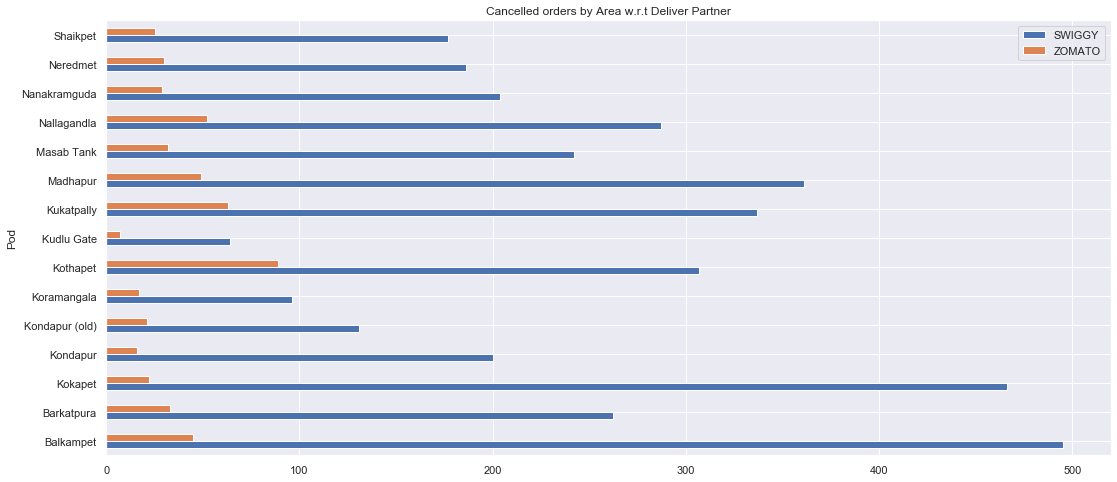

In [360]:
cld_by_area.unstack().plot.barh(figsize=(18, 8))
plt.title('Cancelled orders by Area w.r.t Deliver Partner')
plt.legend(['SWIGGY', 'ZOMATO'])
plt.show()

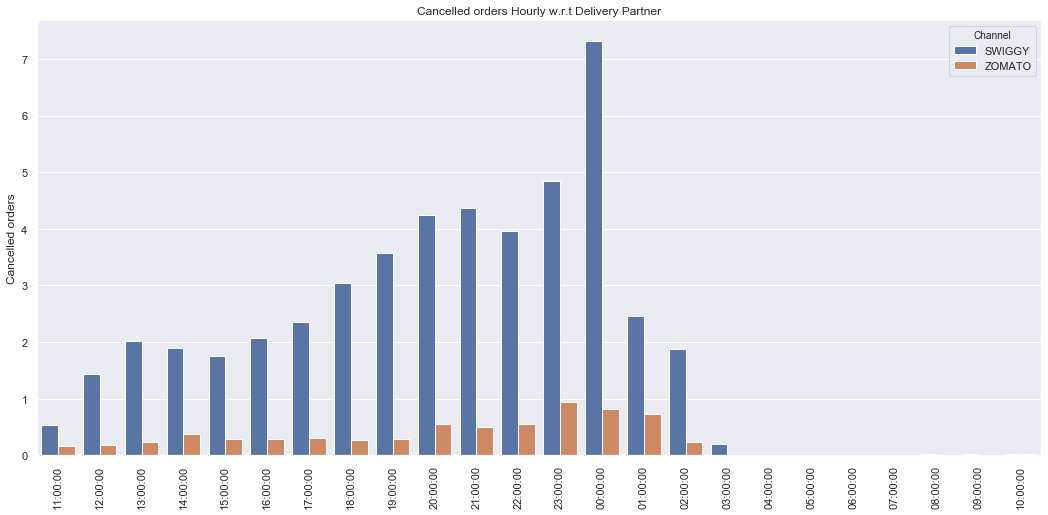

In [339]:
plt.figure(figsize=(18, 8))
sns.barplot(cancld_by_chanl['Created At'].dt.time, cancld_by_chanl['Cancelled'], ci=None, hue=cancld_by_chanl['Channel'])
plt.title('Cancelled orders Hourly w.r.t Delivery Partner')
plt.xlabel('')
plt.ylabel('Cancelled orders')
plt.xticks(rotation=90)
plt.show()

#### Clearly, more number of cancellations are from Swiggy in all the areas. Balkampet sees highest number of cancellations followed by Kokapet and Kothapet. And cancellations are highest in midnight, which is in contrast to the number of orders from hourly orders analysis (As orders reach peak and tend to decrease from 9PM). One possible explanation could be that materials go out of stock. 

# 7. Time taken to accept orders and time taken to mark food ready.

In [67]:
vis_df['m-aTime'] = (vis_df['M.F.R At'] - vis_df['Accepted At']).dt.total_seconds()/60
vis_df.head()

,Channel,Status,Pod,Created At,Accepted At,M.F.R At,Dispatched,Cancelled,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,Items,order_value,m-aTime,a-cTime
0,SWIGGY,DISPATCHED,Barkatpura,2020-09-01 11:08:18,2020-09-01 11:08:49,2020-09-01 11:17:17,2020-09-01 11:18:52,NaT,166.00,153.0,7.65,5,0.0,Istah's Chicken Shawarma (rumali),165.65,8.466667,31.0
1,SWIGGY,DISPATCHED,Koramangala,2020-09-01 11:08:58,2020-09-01 11:28:42,NaT,2020-09-01 11:48:23,NaT,331.00,306.0,15.30,10,0.0,Istah's Chicken Shawarma (khubus),331.30,NaN,1184.0
2,ZOMATO,DISPATCHED,Kudlu Gate,2020-09-01 11:12:35,2020-09-01 11:13:50,2020-09-01 12:10:32,2020-09-01 12:11:13,NaT,197.32,223.0,8.92,10,44.6,Chicken Biryani - Full,241.92,56.700000,75.0
3,SWIGGY,DISPATCHED,Nanakramguda,2020-09-01 11:13:53,2020-09-01 11:14:40,2020-09-01 11:30:16,2020-09-01 11:30:34,NaT,389.00,360.0,18.00,10,0.0,"Chicken Shawarma In Khubus, Fruit Milk By Goli...",388.00,15.600000,47.0
4,SWIGGY,DISPATCHED,Balkampet,2020-09-01 11:14:47,2020-09-01 11:17:24,2020-09-01 11:36:55,2020-09-01 11:37:30,NaT,248.00,226.0,11.30,10,0.0,Hummus With Toasted Pita Bread,247.30,19.516667,157.0


In [79]:
mfr = vis_df[vis_df['m-aTime']>1]
print(mfr.shape)
mfr.describe()

(99215, 17)


,Grand Total,Sub Total,Total Taxes,Total Charges,Discount,order_value,m-aTime,a-cTime
count,99215.000000,99215.000000,99215.000000,99215.000000,99215.000000,99215.000000,99215.000000,99215.000000
mean,259.404429,270.512443,12.277915,9.183642,32.457373,291.973999,12.107298,29.848259
std,161.912344,158.351045,7.566372,6.017152,34.099703,171.181369,8.025050,34.565215
min,3.000000,20.000000,0.000000,0.000000,0.000000,21.000000,1.000000,3.000000
25%,155.000000,153.000000,7.150000,5.000000,0.000000,165.650000,7.483333,22.000000
50%,202.600000,223.000000,9.600000,10.000000,30.600000,244.150000,10.733333,24.000000
75%,311.000000,306.000000,14.800000,10.000000,50.000000,331.800000,15.100000,28.000000
max,4490.000000,4194.000000,213.800000,180.000000,714.000000,4578.700000,566.150000,2106.000000


1.0000200000000001

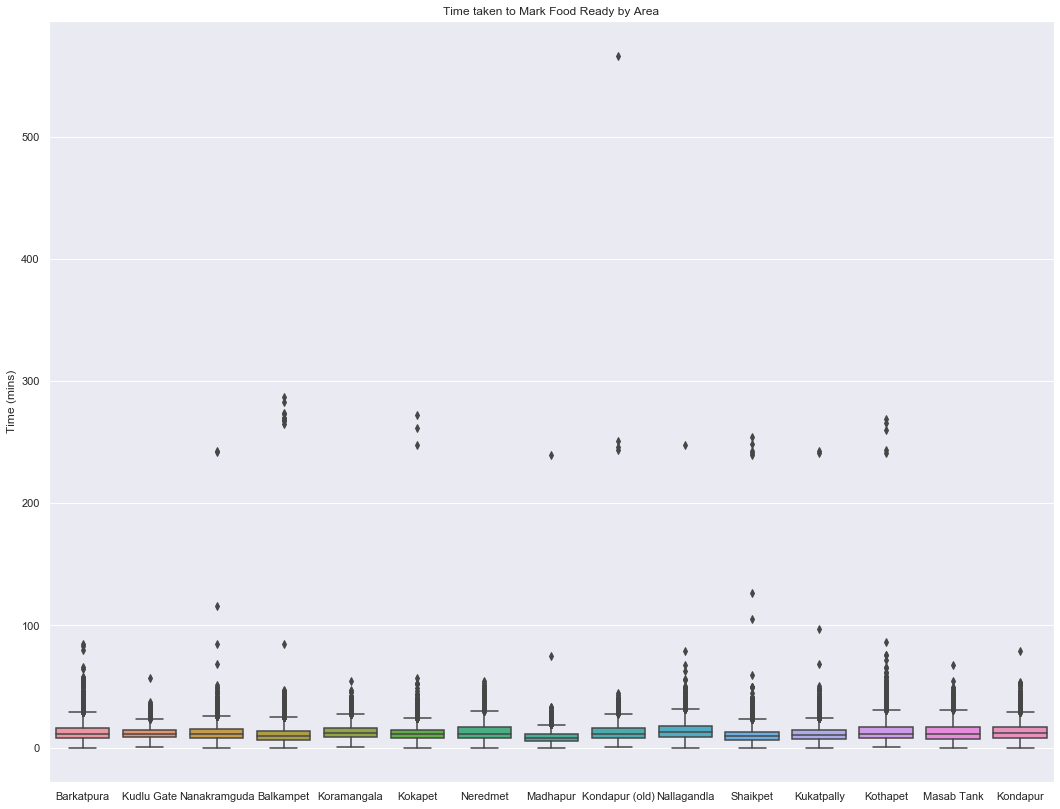

In [71]:
sns.set()
plt.figure(figsize=(18, 14))
sns.boxplot(x='Pod', y='m-aTime', data=mfr) 
plt.title('Time taken to Mark Food Ready by Area')
plt.xlabel('')
plt.ylabel('Time (mins)')
plt.show()

### There are good number of outliers and it doesn't make sense that there are instances where time taken to prepare food is more than 4 hours (15000s) and in a 1000 orders less than or equal to 1 min. But most of the orders lie under 33 mins. Madhapur takes least amount of time to prepare food followed by Kudlu Gate. 

In [58]:
vis_df['a-cTime'] = (vis_df['Accepted At'] - vis_df['Created At']).dt.total_seconds()

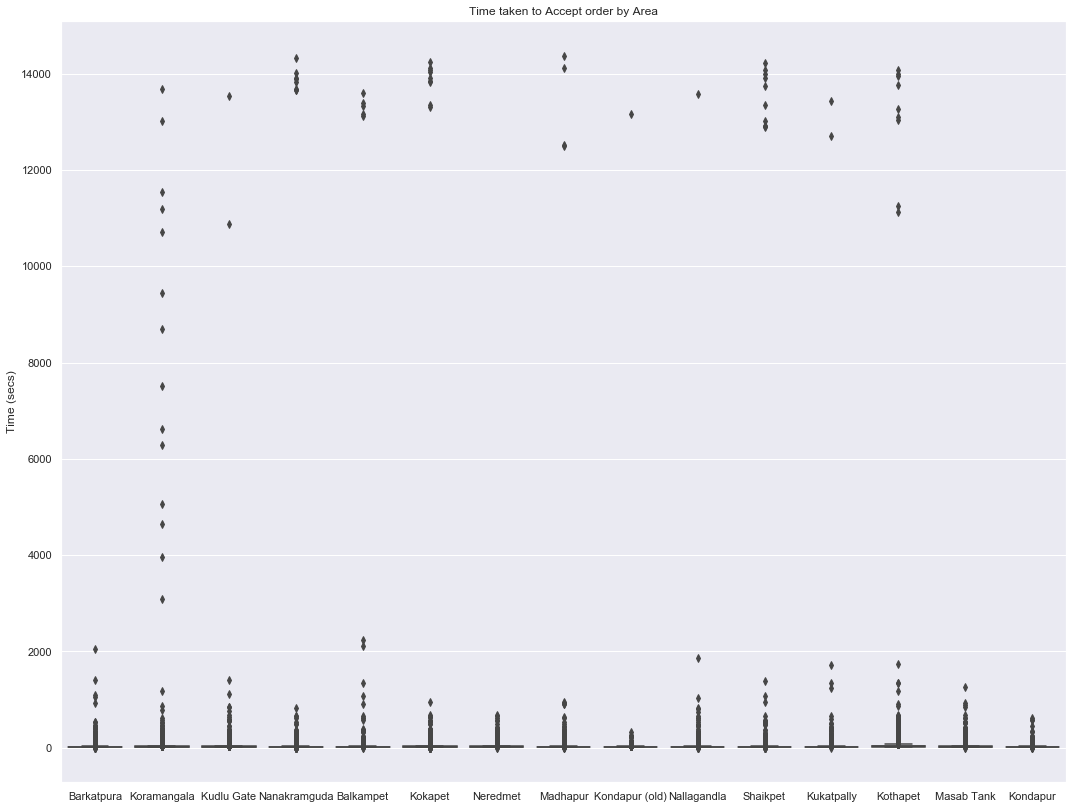

In [61]:
sns.set()
plt.figure(figsize=(18, 14))
sns.boxplot(x='Pod', y='a-cTime', data=vis_df) 
plt.title('Time taken to Accept order by Area')
plt.xlabel('')
plt.ylabel('Time (secs)')
plt.show()

In [84]:
vis_df.shape

(105591, 17)

In [85]:
# removing a percentage of outliers
accptd = vis_df[vis_df['a-cTime']<2000]
accptd.shape

(102875, 17)

More than 3000 orders show abnormal times to accept order

In [80]:
vis_df['a-cTime'].describe()

count    102943.000000
mean         37.882479
std         318.530464
min           3.000000
25%          22.000000
50%          24.000000
75%          28.000000
max       14368.000000
Name: a-cTime, dtype: float64

In [86]:
accptd['a-cTime'].describe()

count    102875.000000
mean         30.058547
std          35.970320
min           3.000000
25%          22.000000
50%          24.000000
75%          28.000000
max        1867.000000
Name: a-cTime, dtype: float64

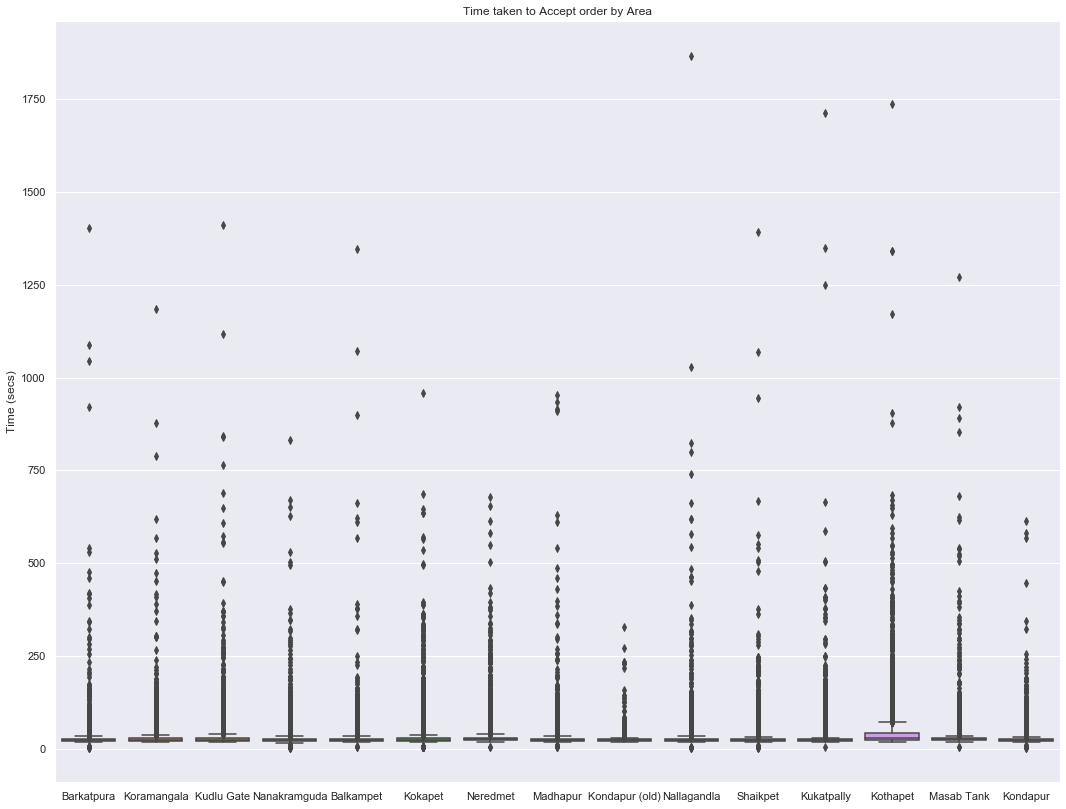

In [89]:
sns.set()
plt.figure(figsize=(18, 14))
sns.boxplot(x='Pod', y='a-cTime', data=accptd) 
plt.title('Time taken to Accept order by Area')
plt.xlabel('')
plt.ylabel('Time (secs)')
plt.show()

It is still hard to visualize. Lets remove more outliers to see the actual distribution.

In [90]:
accptd = vis_df[vis_df['a-cTime']<200]
accptd.shape

(102290, 17)

In [93]:
accptd['a-cTime'].describe()

count    102290.000000
mean         28.010783
std          15.387995
min           3.000000
25%          22.000000
50%          24.000000
75%          27.000000
max         199.000000
Name: a-cTime, dtype: float64

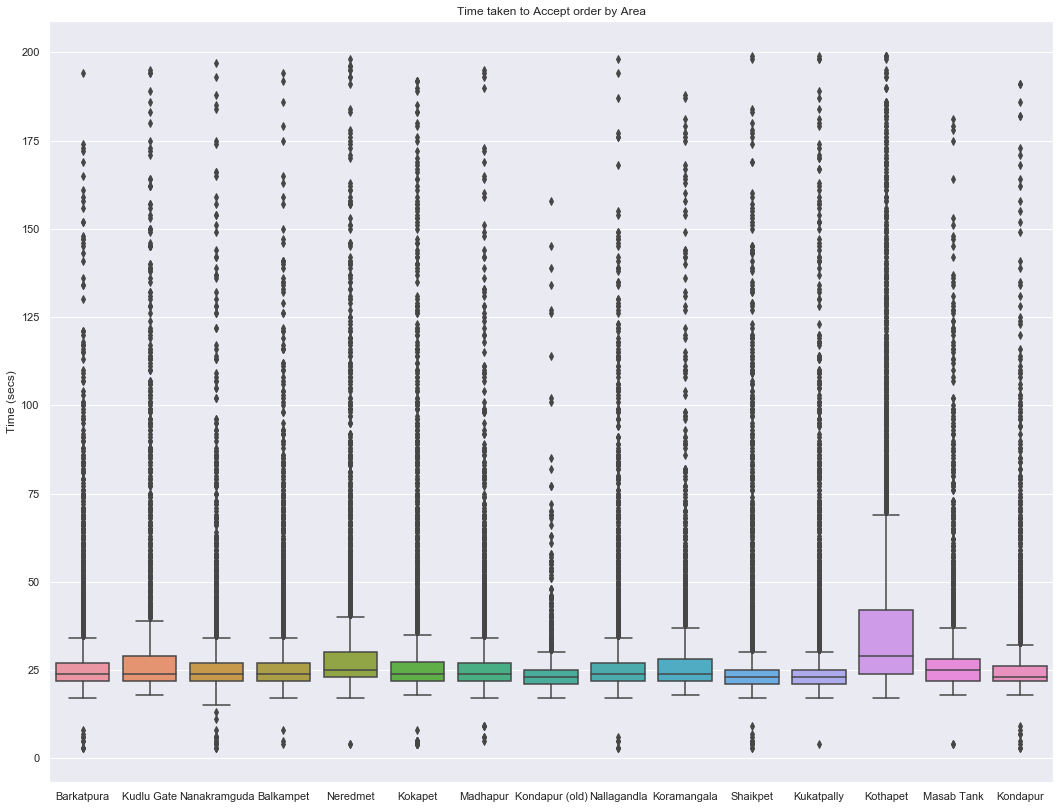

In [91]:
sns.set()
plt.figure(figsize=(18, 14))
sns.boxplot(x='Pod', y='a-cTime', data=accptd) 
plt.title('Time taken to Accept order by Area')
plt.xlabel('')
plt.ylabel('Time (secs)')
plt.show()

### Minimum time taken to accpet orders is usually 10 to 15 secs for all the kitchens. Areas like Kondapur, Shaikpet are swift in accepting orders. Kothapet takes highest amount of time to accpet order usually which is 30s to 1 min. 